In [3]:
set.seed(2004)

In [48]:
library(tidyverse)
library(repr)
library(dplyr)
library(ggplot2)

# Introduction

In this study, we utilize the UCI Adult Census Salary dataset, which gathers demographic and employment-related information from the 1994 U.S. census.

The dataset comprises 15 variables, encompassing both numerical and categorical types, to capture a comprehensive snapshot of the American workforce during that time. The numerical variables include age, final weight (fnlwgt) representing the number of people in the U.S. someone symbolizes, education-num reflecting the total years of education, capital-gain and capital-loss indicating financial earnings or losses from investments outside of work, and hours-per-week detailing work hours. Categorical variables encompass workclass, education, marital status, occupation, relationship, race, sex, native country, and salary, with the latter serving as the prediction target to determine if an individual's annual income exceeds $50,000.

The motivation behind analyzing this dataset stems from a desire to understand the critical factors influencing income levels and to identify potential biases in income distribution across different demographic groups, such as gender and race. Additionally, this analysis aims to detect workforce trends, such as variations in education level distributions across different occupations. By employing different techniques and algorithms in data science, this project seeks to predict whether an individual will earn more than $50,000 per year based on their attributes within the dataset. This investigation not only contributes to a deeper understanding of the economic and social dynamics of the 1990s American workforce but also enhances our knowledge of applying data science methodologies in real-world socioeconomic research.


In [34]:
# Read the adult.data file
# The `adult.names` file typically contains information on the attributes and you need to specify them manually
column_names = c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", 
                 "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", 
                 "income")

adult_data <- read.csv("~/Downloads/adult (1)/adult.data", header = FALSE, sep = ",", col.names = column_names, na.strings = " ?")

# Check the first few rows of the data
head(adult_data)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [37]:
nrow(adult_data)

[1] 32561

# EDA


### Figure1. Age vs number of people who receive income > 50k by different sex group


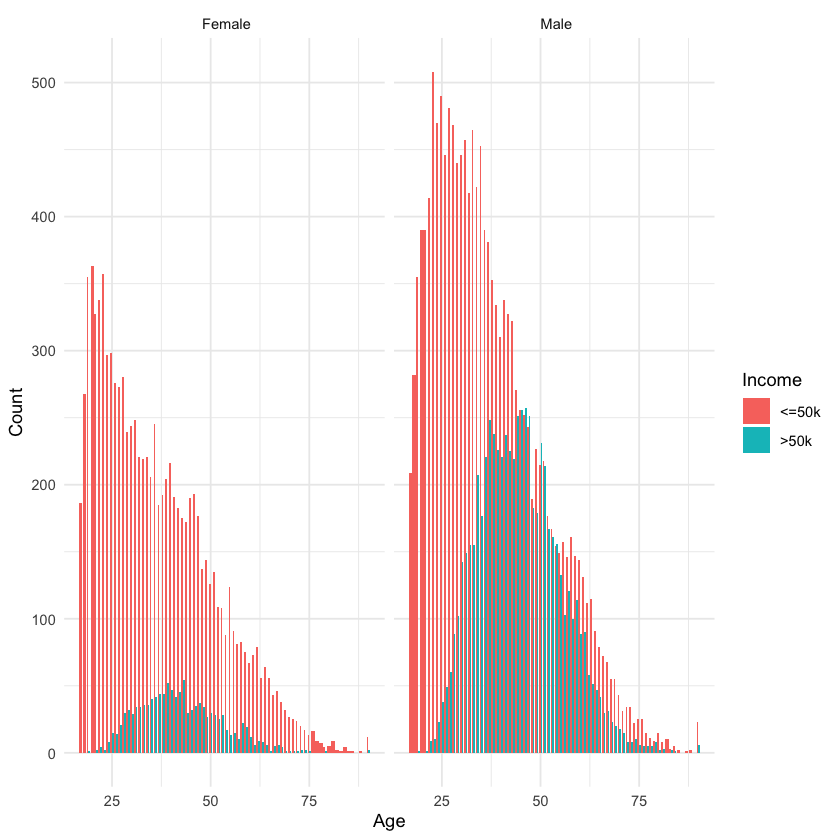

In [53]:
summary_data <- adult_data %>%
    group_by(age, sex, income) %>%
    summarise(count = n(), .groups = 'drop') %>%
    mutate(income = ifelse(income == 0, "<=50k", ">50k"))

ggplot(summary_data, aes(x = age, y = count, fill = income)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_grid(. ~ sex) +
    labs(x = "Age", y = "Count", fill = "Income") +
    theme_minimal()


In [57]:
head(summary_data)

age,sex,income,count
<int>,<chr>,<chr>,<int>
17,Female,<=50k,186
17,Male,<=50k,209
18,Female,<=50k,268
18,Male,<=50k,282
19,Female,<=50k,355
19,Female,>50k,1


### Figure2. Education vs number of people who receive income > 50k

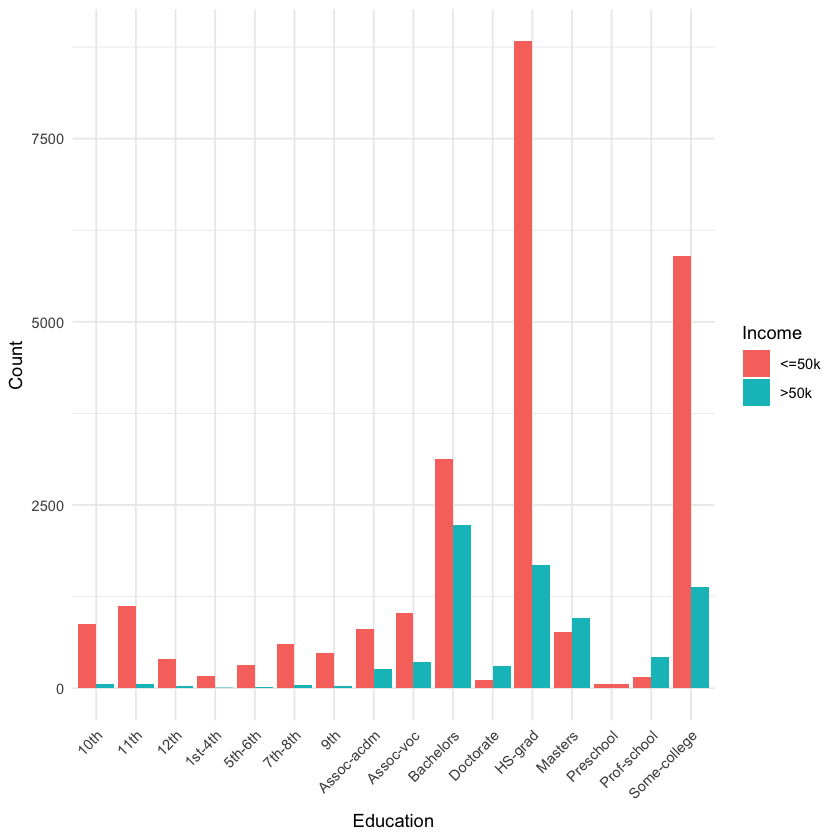

In [58]:
summary_data <- adult_data %>%
    group_by(education, income) %>%
    summarise(count = n(), .groups = 'drop') %>%
    mutate(income = ifelse(income == 0, "<=50k", ">50k"))
ggplot(summary_data, aes(x = education, y = count, fill = income)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Education", y = "Count", fill = "Income") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Combine theme settings


### Figure 3: Race vs Number of People Colored by Income of Different Sex Groups

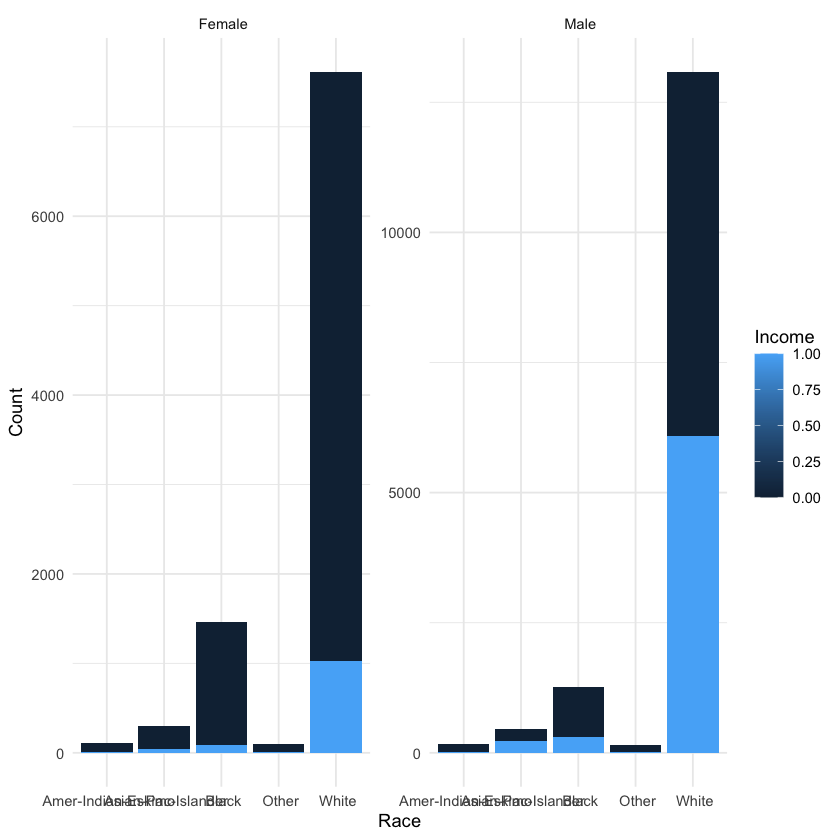

In [59]:
summary_data <- adult_data %>%
  group_by(race, sex, income) %>%
  summarise(count = n(), .groups = 'drop') # Drop the grouping

# Plotting the data
ggplot(summary_data, aes(x = race, y = count, fill = income)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~sex, scales = "free") +
  labs(x = "Race", y = "Count", fill = "Income") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()

### Figure 4: Sex vs Number of People Represented (fnlwgt) Colored by Income


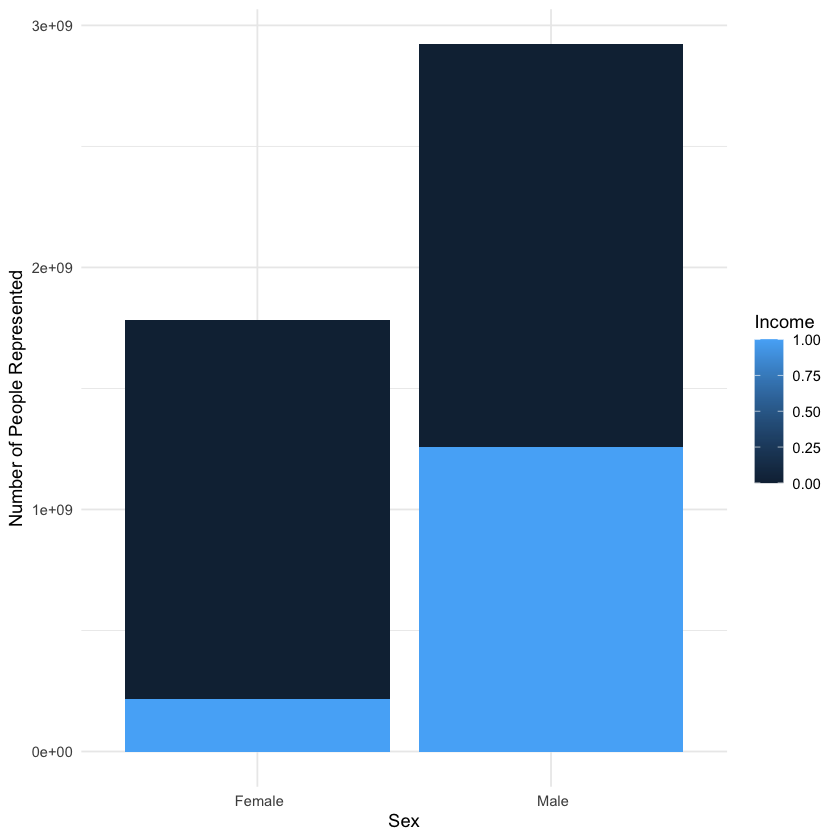

In [60]:
fnlwgt_data <- adult_data %>%
  group_by(sex, income) %>%
  summarise(total_fnlwgt = sum(fnlwgt), .groups = 'drop') # Sum fnlwgt and drop the grouping

# Plotting the data
ggplot(fnlwgt_data, aes(x = sex, y = total_fnlwgt, fill = income)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Sex", y = "Number of People Represented", fill = "Income") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()

# data cleaning

### summary stat

In [38]:
# Displaying the structure of the dataset
str(adult_data)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native_countr

In [39]:
summary(adult_data)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

### remove missing values by replacing with mode

In [40]:
# Counting missing values for each column
missing_values_per_column <- sapply(adult_data, function(x) sum(is.na(x)))
print(missing_values_per_column)


           age      workclass         fnlwgt      education  education_num 
             0           1836              0              0              0 
marital_status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital_gain   capital_loss hours_per_week native_country         income 
             0              0              0            583              0 


In [47]:
# For the 'workclass' and 'occupation' categorical variables, you can replace missing values with the mode.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Replace NA with the most common value (mode)
adult_data$workclass[is.na(adult_data$workclass)] <- getmode(adult_data$workclass)
adult_data$occupation[is.na(adult_data$occupation)] <- getmode(adult_data$occupation)
adult_data$native_country[is.na(adult_data$native_country)] <- getmode(adult_data$native_country)


### transforming the response var to 0 and 1

In [41]:
# Trim leading and trailing whitespace
adult_data$income <- trimws(adult_data$income)
sf
# Transformation so response is 0 or 1
adult_data$income <- ifelse(adult_data$income == ">50K", 1, 0)

# Check the changes
table(adult_data$income)



    0     1 
24720  7841 

### spliting the dataset

In [42]:
set.seed(123) # Setting a seed for reproducibility

# Assuming 'data' is your dataframe
sample_size <- floor(0.75 * nrow(adult_data)) # Size of the training set: 75% of the data

# Creating a random sample of row indices for the training set
train_indices <- sample(seq_len(nrow(adult_data)), size = sample_size)

# Splitting the data into training and testing sets
train_set <- adult_data[train_indices, ]
test_set <- adult_data[-train_indices, ]


In [43]:
head(train_set,20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
18847,33,NA,102130,Some-college,10,Never-married,NA,Own-child,White,Male,0,0,40,United-States,0
18895,26,Private,130931,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,0
26803,40,Private,233130,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,El-Salvador,0
25102,36,Self-emp-inc,107218,Some-college,10,Divorced,Sales,Unmarried,Asian-Pac-Islander,Male,0,0,55,United-States,0
28867,43,State-gov,28451,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,37,United-States,1
2986,23,Private,161708,Bachelors,13,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,0
1842,34,Local-gov,62463,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1579,40,United-States,0
25718,34,Self-emp-not-inc,254304,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,4508,0,90,United-States,0
3371,38,Private,348739,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,0


# MODEL TRAINING

### Logistic regression

In [51]:
# fit model using glm
log_model <- glm(income ~ ., data = train_set, family = binomial)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [52]:
summary(log_model)


Call:
glm(formula = income ~ ., family = binomial, data = train_set)

Coefficients: (1 not defined because of singularities)
                                            Estimate Std. Error z value
(Intercept)                               -7.090e+00  9.361e-01  -7.574
age                                        2.702e-02  1.982e-03  13.631
workclass Local-gov                       -6.243e-01  1.327e-01  -4.703
workclass Private                         -4.530e-01  1.107e-01  -4.092
workclass Self-emp-inc                    -2.949e-01  1.443e-01  -2.043
workclass Self-emp-not-inc                -9.117e-01  1.289e-01  -7.073
workclass State-gov                       -7.109e-01  1.469e-01  -4.839
workclass Without-pay                     -1.317e+01  2.189e+02  -0.060
fnlwgt                                     8.529e-07  2.035e-07   4.191
education 11th                             2.407e-01  2.489e-01   0.967
education 12th                             6.461e-01  3.169e-01   2.039
education 

In [46]:
# Assuming 'test_set' is your testing dataset
# Making predictions
predictions <- predict(model, newdata=test_set, type="response")

# The predictions are probabilities of the positive class (e.g., 1)
# To classify as 0 or 1 based on a threshold (e.g., 0.5):
predicted_classes <- ifelse(predictions > 0.5, 1, 0)

# You can adjust the threshold based on your specific needs


ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor workclass has new levels  Never-worked
